In [3]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

# Lendo arquivo de dados do Titanic
df = pd.read_csv('titanic-data-6.csv')

# Testando se a importação ocorreu bem
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Limpeza de dados:

# Como vou utilizar a idade na minha análise, vou substituir os valores nulos pela média de idade total

# O mesmo irá acontecer com o Fare, vou retirar as tarifas gratuitas considerando que foi um erro de cadastramento / falta de dados

In [4]:
# Calculando a media de idade, e arredondano para baixo com floor
mediaIdade = math.floor(df['Age'].mean())

print('A média de idade é de %d anos' % mediaIdade)

A média de idade é de 29 anos


In [5]:
# Verificando Nan na coluna Age
dfIsNull = df.isnull().sum()

print('Há %d dados faltantes na coluna de idade.' % dfIsNull.Age)

Há 177 dados faltantes na coluna de idade.


In [6]:
# Substituindo as celulas de idade nulas
df['Age'] = df['Age'].fillna(mediaIdade)

dfIsNull = df.isnull().sum()

print('Agora há %d dados faltantes na coluna de idade.' % dfIsNull.Age)

Agora há 0 dados faltantes na coluna de idade.


In [7]:
# Calculando a media de Fare (taxas), e arredondano para baixo com floor
mediaFare = math.floor(df['Fare'].mean())

print('A média de Fare é de %d dólares (supondo que foi cobrado em dólar)' % mediaFare)

A média de Fare é de 32 dólares (supondo que foi cobrado em dólar)


In [8]:
# Verificando valores zerados na coluna Fare
dfIsZero = (df['Fare'] == 0).sum()

print('Há %d passagens com valor zerado' % dfIsZero)

Há 15 passagens com valor zerado


In [9]:
# Substituindo as celulas de Fare zeradas
df['Fare'] = df['Fare'].replace(0, mediaFare)

dfIsZero = (df['Fare'] == 0).sum()

print('Agora há %d dados zerados na coluna tarifas.' % dfIsZero)

Agora há 0 dados zerados na coluna tarifas.


# Agora que resolvemos os problemas nos dados, vamos para a análise!

# Vamos analisar os dados do Titanic com algumas perguntas

# 1 - Qual a quantidade de homens e mulheres no Titanic?

In [10]:
male = (df['Sex'] == 'male').sum()

female = (df['Sex'] == 'female').sum()

print("De acordo com estes dados o titanic tinha %d pessoas do sexo masculino e %d do sexo feminino." % (male, female))

De acordo com estes dados o titanic tinha 577 pessoas do sexo masculino e 314 do sexo feminino.


# Vemos que há mais homens que mulheres no navio.

# 2 - Qual a media de idade dos homens e das mulheres?

In [11]:
# Formando novos dataframes a partir do sexo
male_df = df.loc[df['Sex'] == 'male']
female_df = df.loc[df['Sex'] == 'female']

# Calulando as medias dos dois grupos
media_male = math.floor(male_df['Age'].sum() / male)
media_female = math.floor(female_df['Age'].sum() / female)

print("A média de idade dos homens no Titanic é de %d anos e das mulheres é de %d anos." % (media_male, media_female))

A média de idade dos homens no Titanic é de 30 anos e das mulheres é de 28 anos.


# As mulheres são mais novas que os homens!

# Vamos verificar agora a distribuição entre as classes socioeconomicas do Titanic

# 3 - Qual a classe que tem mais ingressantes?

In [12]:
firstClass  = df.loc[df['Pclass'] == 1]
secondClass = df.loc[df['Pclass'] == 2]
thirdClass  = df.loc[df['Pclass'] == 3]

print("A primeira classe tinha %d passageiros, a segunda %d e por fim a terceira %d" % (len(firstClass), len(secondClass), len(thirdClass)))

A primeira classe tinha 216 passageiros, a segunda 184 e por fim a terceira 491


# A classe mais ecônomica, foi a mais populada

# 4 - Qual é o preço do ticket mais caro e do mais barato?

In [13]:
highestFare = df['Fare'].max()
minimumFare = df['Fare'].min()

print('A tarifa mais cara foi de $%d e a mais barata de $%d dólares' % (highestFare, minimumFare))

A tarifa mais cara foi de $512 e a mais barata de $4 dólares


# Vamos analisar agora a questão de sobrevivência, quais foram os fatores que mais fizeram os tripulantes sobreviver

# 5 - Quais os fatores que mais fizeram as pessoas sobreviverem?

# 5.1 - Verificando pela classe:

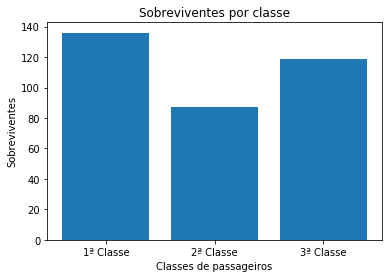

In [14]:

firstClassSurv = df.loc[(df['Pclass'] == 1) & df['Survived'] == 1]
secondClassSurv = df.loc[(df['Pclass'] == 2) & df['Survived'] == 1]
thirdClassSurv = df.loc[(df['Pclass'] == 3) & df['Survived'] == 1]

locations = [1, 2, 3]
heights = [len(firstClassSurv), len(secondClassSurv), len(thirdClassSurv)]
labels = ['1ª Classe', '2ª Classe', '3ª Classe']
plt.bar(locations, heights, tick_label=labels)
plt.title('Sobreviventes por classe')
plt.xlabel('Classes de passageiros')
plt.ylabel('Sobreviventes');

# Podemos verificar que o fato do passageiro ser da primeira classe ajudou na sua sobrevivência, 

# Porem a segunda classe não manteve esta lógica, pois a terceira teve mais sobreviventes

# Será que isso está correto? Vamos comparar com o total de tripulantes de cada classe

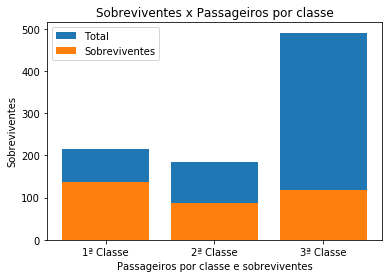

In [15]:
locations = [1, 2, 3]

classes = [len(firstClass), len(secondClass), len(thirdClass)]
plt.bar(locations, classes, tick_label=labels, label='Total')

classes = [len(firstClassSurv), len(secondClassSurv), len(thirdClassSurv)]
labels = ['1ª Classe', '2ª Classe', '3ª Classe']

plt.bar(locations, classes, tick_label=labels, label='Sobreviventes')
plt.title('Sobreviventes x Passageiros por classe')
plt.xlabel('Passageiros por classe e sobreviventes')
plt.ylabel('Sobreviventes')
plt.legend()

# Temos uma surpresa, na verdade por questões de proporção a segunda classe sobreviveu mais sim que a terceira,

# Apenas por sua quantidade maior a terceira tem mais sobreviventes,

# Agora podemos afirmar que a classe determinou sim quem sobreviveu!

# 5.2 - O local onde embarcaram pode ter influenciado na sobrevivência?

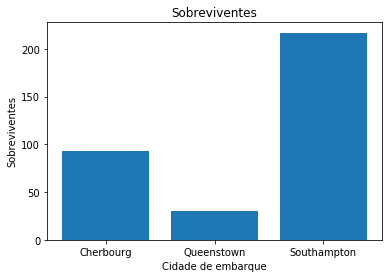

In [16]:
cherbourgSurv = df.loc[(df['Embarked'] == 'C') & df['Survived'] == 1]
queenstownSurv = df.loc[(df['Embarked'] == 'Q') & df['Survived'] == 1]
southamptonSurv = df.loc[(df['Embarked'] == 'S') & df['Survived'] == 1]

locations = [1, 2, 3]
heights = [len(cherbourgSurv), len(queenstownSurv), len(southamptonSurv)]
labels = ['Cherbourg', 'Queenstown', 'Southampton']
plt.bar(locations, heights, tick_label=labels)
plt.title('Sobreviventes por cidade de embarque')
plt.xlabel('Cidade de embarque')
plt.ylabel('Sobreviventes');

# Agora diferente dos outros, uma grande disparidade dos sobreviventes foi de Southampton,

# Vamos ver se há relação com o número de pessoas que embarcaram nos locais:

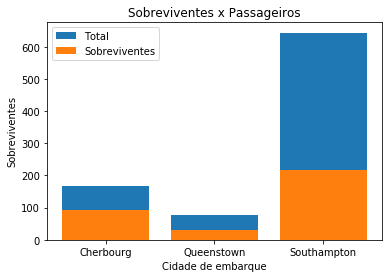

In [17]:
cherbourg = df.loc[(df['Embarked'] == 'C')]
queenstown = df.loc[(df['Embarked'] == 'Q')]
southampton = df.loc[(df['Embarked'] == 'S')]

locations = [1, 2, 3]

classes = [len(cherbourg), len(queenstown), len(southampton)]
plt.bar(locations, classes, tick_label=labels, label='Total')

classes = [len(cherbourgSurv), len(queenstownSurv), len(southamptonSurv)]
labels = ['Cherbourg', 'Queenstown', 'Southampton']

plt.bar(locations, classes, tick_label=labels, label='Sobreviventes')
plt.title('Total de passageiros x Sobreviventes por cidade de embarque')
plt.xlabel('Cidade de embarque')
plt.ylabel('Sobreviventes')
plt.legend()

# Podemos ver que sim, a quantidade de embarque em Southampton foi maior!

# Vamos verificar a distribuição de classes na região de Southampton: 

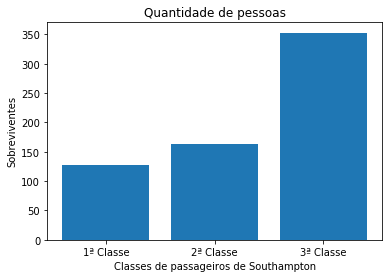

In [18]:
firstClassSouthAmpton = df.loc[(df['Pclass'] == 1) & (df['Embarked'] == 'S')]
secondClassSouthAmpton = df.loc[(df['Pclass'] == 2) & (df['Embarked'] == 'S')]
thirdClassSouthAmpton = df.loc[(df['Pclass'] == 3) & (df['Embarked'] == 'S')]

locations = [1, 2, 3]
heights = [len(firstClassSouthAmpton), len(secondClassSouthAmpton), len(thirdClassSouthAmpton)]
labels = ['1ª Classe', '2ª Classe', '3ª Classe']
plt.bar(locations, heights, tick_label=labels)
plt.title('Quantidade de pessoas em cada classe de Southampton')
plt.xlabel('Classes de passageiros de Southampton')
plt.ylabel('Sobreviventes');

# Como a classe 3 tem mais população e sobreviveram menos, proporcionalmente, as pessoas que embarcaram em Southampton, temos uma relação de classe x sobrevivência, tambem entre cidades

# Só falta verificar a proprorção de sobreviventes entre as classes de Southampton, vamos ver agora:

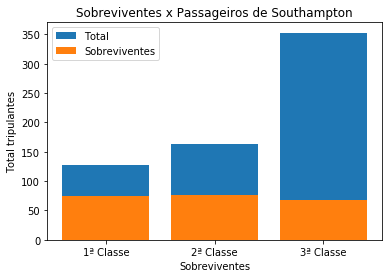

In [19]:
firstClassSouthAmptonSurv = df.loc[(df['Pclass'] == 1) & (df['Embarked'] == 'S') & df['Survived'] == 1]
secondClassSouthAmptonSurv = df.loc[(df['Pclass'] == 2) & (df['Embarked'] == 'S') & df['Survived'] == 1]
thirdClassSouthAmptonSurv = df.loc[(df['Pclass'] == 3) & (df['Embarked'] == 'S') & df['Survived'] == 1]

locations = [1, 2, 3]

heights = [len(firstClassSouthAmpton), len(secondClassSouthAmpton), len(thirdClassSouthAmpton)]
plt.bar(locations, heights, tick_label=labels, label='Total')

classes = [len(firstClassSouthAmptonSurv), len(secondClassSouthAmptonSurv), len(thirdClassSouthAmptonSurv)]
labels = ['1ª Classe', '2ª Classe', '3ª Classe']

plt.bar(locations, classes, tick_label=labels, label='Sobreviventes')
plt.title('Sobreviventes x Passageiros de Southampton separados por classe')
plt.xlabel('Sobreviventes')
plt.ylabel('Total tripulantes')
plt.legend()

# Em Southampton é claro para nós que a sobrevivência foi influenciada pela classe

# Agora trocando de fator, sabemos que a ordem é salvar primeiro os mais novos, mulheres e idosos, será que a idade influenciou na sobrevivência?

# 5.3  - A idade dos passageiros influenciou na sobrevivência deles?

# Primeiro vamos criar grupos de idade, com os seguinte grupos:

## Criança = 0 - 14 anos
## Jovens e adultos = 15 - 64 anos
## Idosos = mais de 65 anos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


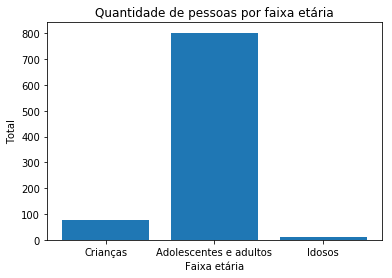

In [22]:
youngTotal     = df.loc[(df['Age'] <= 14)]
middleageTotal = df.loc[(df['Age'] > 14) & (df['Age'] < 65)]
oldTotal       = df.loc[(df['Age'] >= 65)]

locations = [1, 2, 3]
heights = [len(youngTotal), len(middleageTotal), len(oldTotal)]
labels = ['Crianças', 'Adolescentes e adultos', 'Idosos']

plt.bar(locations, heights, tick_label=labels)
plt.title('Quantidade de pessoas por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Total');

# Com os grupos divididos podemos ver que a maioria são adolescentes e adultos,

# E agora vamos comparar a questão da sobrevivência:

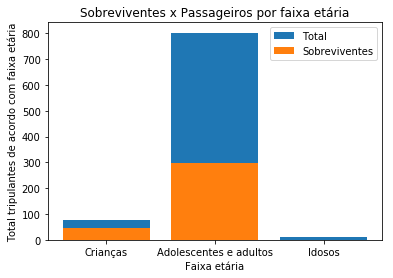

In [21]:
youngTotalSurv     = df.loc[(df['Age'] <= 14) & df['Survived'] == 1]
middleageTotalSurv = df.loc[(df['Age'] > 14) & (df['Age'] < 65) & df['Survived'] == 1]
oldTotalSurv       = df.loc[(df['Age'] >= 65) & df['Survived'] == 1]


locations = [1, 2, 3]

heights = [len(youngTotal), len(middleageTotal), len(oldTotal)]
plt.bar(locations, heights, tick_label=labels, label='Total')

classes = [len(youngTotalSurv), len(middleageTotalSurv), len(oldTotalSurv)]
labels = ['Crianças', 'Adolescentes e adultos', 'Idosos']

plt.bar(locations, classes, tick_label=labels, label='Sobreviventes')
plt.title('Sobreviventes x Passageiros por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Total tripulantes de acordo com faixa etária')
plt.legend()

# As crianças sobreviveram mais do que a metade de sua quantidade total, e os idosos apenas 1 de 10 presentes nos dados.

# Pelo menos as crianças foram respeitadas a prioridade

# 5.4 - para finalizar, o sexo influenciou na sobrevivência dos tripulantes?

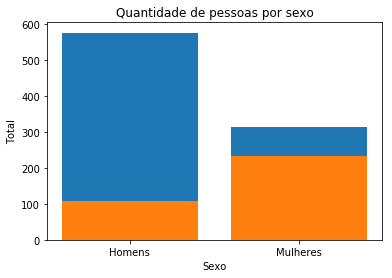

In [25]:
locations = [1, 2]
heights = [len(male_df), len(female_df)]
labels = ['Homens', 'Mulheres']

plt.bar(locations, heights, tick_label=labels, label='Total')

maleSurv = df.loc[(df['Sex'] == 'male') & (df['Survived'] == 1)]
femaleSurv = df.loc[(df['Sex'] == 'female')  & (df['Survived'] == 1)]

classes = [len(maleSurv), len(femaleSurv)]

plt.bar(locations, classes, tick_label=labels, label='Sobreviventes')

plt.title('Quantidade de pessoas por sexo')
plt.xlabel('Sexo')
plt.ylabel('Total');

# As mulheres foram priorizadas!

# Além de em quantidade foi maior que a dos homens, a proporção tambem foi gritantemente maior!

# E agora finalizamos a análise.